In [4]:
from collections import namedtuple
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Подготавливаем данные 

In [13]:
# Предполагаем, что у каждого класса есть свой класс и в каждом классе проставляем номер курса класса

CLASS_TABLE = np.zeros(6 * 8)

CLASSROOMS = ['r1','r2','r3','r4','r5','r6','r7','r8']
CLASSES = {'5а':['Математика',     5,
                 'Русский',        6,
                 'Литература',     3,
                 'ИЗО',            1,
                 'Музыка',         1,
                 'Физкультура',    2,
                 'Труд',           2,
                 'История',        2,
                 'География',      2,
                 'Информатика',    1,
                 'Немецкий язык',  2,
                 'Биология',       1
                ], 
           '5б':['Математика',     5,
                 'Русский',        6,
                 'Литература',     3,
                 'ИЗО',            1,
                 'Музыка',         1,
                 'Физкультура',    2,
                 'Труд',           2,
                 'История',        2,
                 'География',      2,
                 'Информатика',    1,
                 'Немецкий язык',  2,
                 'Биология',       1
                ],
           '6а':['Математика',      5,
                 'Русский',         7,
                 'Литература',      3,
                 'ИЗО',             1,
                 'Музыка',          1,
                 'Физкультура',     3,
                 'Труд',            2,
                 'История',         2,
                 'География',       1,
                 'Информатика',     1,
                 'Немецкий язык',   3,
                 'Французский язык',2,
                 'Общестовазнание', 1,
                 'Биология',        1
                ], 
           '6б':['Математика',       5,
                 'Русский',          7,
                 'Литература',       3,
                 'ИЗО',              1,
                 'Музыка',           1,
                 'Физкультура',      3,
                 'Труд',             2,
                 'История',          2,
                 'География',        1,
                 'Информатика',      1,
                 'Немецкий язык',    3,
                 'Французский язык', 2,
                 'Общестовазнание',  1,
                 'Биология',         1
                ],
           '7а':['Алгебра',          3,
                 'Геометрия',        2,
                 'Русский',          5,
                 'Литература',       2,
                 'ИЗО',              1,
                 'Музыка',           1,
                 'Физкультура',      3,
                 'Труд',             2,
                 'История',          3,
                 'География',        2,
                 'Информатика',      1,
                 'Немецкий язык',    2,
                 'Французский язык', 2,
                 'Общестовазнание',  1,
                 'Биология',         1,
                 'Физика',           2,
                 'ОБЖ',              1
                ],
           '7б':['Алгебра',          3,
                 'Геометрия',        2,
                 'Русский',          5,
                 'Литература',       2,
                 'ИЗО',              1,
                 'Музыка',           1,
                 'Физкультура',      3,
                 'Труд',             2,
                 'История',          3,
                 'География',        2,
                 'Информатика',      1,
                 'Немецкий язык',    2,
                 'Французский язык', 2,
                 'Общестовазнание',  1,
                 'Биология',         1,
                 'Физика',           2,
                 'ОБЖ',              1
                ],
           '8а':['Алгебра',          4,
                 'Геометрия',        2,
                 'Русский',          5,
                 'Литература',       2,
                 'ИЗО',              1,
                 'Музыка',           1,
                 'Физкультура',      3,
                 'Труд',             1,
                 'История',          2,
                 'География',        2,
                 'Информатика',      1,
                 'Немецкий язык',    3,
                 'Общестовазнание',  1,
                 'Биология',         2,
                 'Физика',           2,
                 'ОБЖ',              1,
                 'Химия',            2
                ],
           '9а':['Алгебра',         4,
                 'Геометрия',       2,
                 'Русский',         5,
                 'Литература',      3,
                 #'ИЗО',            1
                 #'Музыка',       # 1
                 'Физкультура',     3,
                 #'Труд',         # 1
                 'История',         3,
                 'География',       2,
                 'Информатика',     1,
                 'Немецкий язык',   3,
                 'Французский язык', 1,
                 'Общестовазнание',  1,
                 'Биология',        2,
                 'Физика',          3,
                 'ОБЖ',             1,
                 'Химия',           2
                ]          
          }

TEACHERS = ['Чуркина Наталья Аркадьевна',      # Немецкий язык __ французский
            'Просвирин Сергей Дмитриевич',     # История __ Технология
            'Митрохина Альбина Николаевна',    # Математика
            'Захарова Ирина Ивановна',         # Математика __ Физика
            'Суханова Анна Львовна',           # Биологии __ Химии
            'Ершова Светлана Николаевна',      # Физра __ География
            'Селезнева Светлана Валерьевна',   # История Информатика
            'Самарина Валентина Ивановна',     # Немецкий язык __ Французский
            'Сухарева Оксана Николаевна',      # Русский язык __ Литература
            'Меликаева Налия Кирилловна',      # Изо
            'Сидорова Софья Александровна',    # Русский язык __ Литература __ География
            'Соловьева Розалия Андреевна',     # Русский язык __ Литература
            'Тукова Елена Николаевна',         # Технология __ ОБЖ
            'Похвалий Екатерина Михайловна',   # Музыка
            'Сорокина Анастасия Александровна' # Русский язык __ Литература
           ]

lst = ['ItemName','TeacherFIO','Class','count_lessons']
courseDescription = namedtuple('courseDescription', lst)

COURSES_5a = {}
COURSES_5б = {}
COURSES_6a = {}
COURSES_6б = {}
COURSES_7а = {}
COURSES_7б = {}
COURSES_8а = {}
COURSES_9а = {}


for class_, items in CLASSES.items():
    KEY_COURSE = 1
    for count, item in enumerate(zip(items[0::2], items[1::2])):
        lesson = item[0]
        count_lessons_per_week = item[1]
                                 
        if class_ in ['5а','5б','6а','6б','7а'] and lesson in ['Французский язык','Немецкий язык']:
            teacher = TEACHERS[7]
        elif lesson in ['Французский язык','Немецкий язык']:
            teacher = TEACHERS[0]
        
        if class_ in ['5а','5б','6а','6б'] and lesson == 'История':
            teacher = TEACHERS[1]
        elif lesson == 'История':
            teacher = TEACHERS[6]
        
        if class_ in ['5а','5б','6а'] and lesson == 'Труд':
            teacher = TEACHERS[12]
        elif lesson == 'Труд':
            teacher = TEACHERS[1]                         
        
        if (class_ in ['7а','8а','9а'] and lesson in ['Алгебра','Геометрия']) or (lesson == 'Физика'):
            teacher = TEACHERS[3]
        elif lesson in ['Алгебра','Геометрия','Математика']:
            teacher = TEACHERS[2]
            
        if lesson in ['Биология','Химия']:
            teacher = TEACHERS[4]
                                 
        if lesson == 'ИЗО':
            teacher = TEACHERS[9]
                            
        if lesson == 'Музыка':
            teacher = TEACHERS[-2]
        
        if lesson == 'ОБЖ':
            teacher = TEACHERS[-3]
        
        if lesson == 'Информатика':
            teacher = TEACHERS[6]
                                 
        if (lesson == 'Физкультура') or (lesson == 'География' and class_ in ['5а','5б']):
            teacher = TEACHERS[5]
        elif (lesson == 'География') or (lesson in ['Русский', 'Литература'] and class_  == '5а'):
            teacher = TEACHERS[10]
                                 
        if lesson in ['Русский', 'Литература'] and class_  in ['5б','6а']:
            teacher = TEACHERS[8]
        
        if lesson in ['Русский', 'Литература'] and class_  in ['6б','9а']:
            teacher = TEACHERS[-4]
        
        if lesson in ['Русский', 'Литература'] and class_  in ['7а','7б','8а']:
            teacher = TEACHERS[-1]
                                 
        f = courseDescription(item, teacher, class_, count_lessons_per_week)  
        
        # Создаем словари для СЛОВАРЯ
        if class_ == '5а':
            COURSES_5a.update({0: courseDescription('Ничего', 'Ничего', 'Ничего', 20) })
            COURSES_5a.update({KEY_COURSE :  f})
            
        
        if class_ == '5б':
            COURSES_5б.update({0: courseDescription('Ничего', 'Ничего', 'Ничего', 20) })
            COURSES_5б.update({KEY_COURSE :  f})
            
            
        if class_ == '6а':
            COURSES_6a.update({0: courseDescription('Ничего', 'Ничего', 'Ничего', 15) })
            COURSES_6a.update({KEY_COURSE :  f})
            
            
        if class_ == '6б':
            COURSES_6б.update({0: courseDescription('Ничего', 'Ничего', 'Ничего', 15) })
            COURSES_6б.update({KEY_COURSE :  f})
            
        
        if class_ == '7а':
            COURSES_7а.update({0: courseDescription('Ничего', 'Ничего', 'Ничего', 14) })
            COURSES_7а.update({KEY_COURSE :  f})
            
        if class_ == '7б':
            COURSES_7б.update({0: courseDescription('Ничего', 'Ничего', 'Ничего', 14) })
            COURSES_7б.update({KEY_COURSE :  f})
            
        if class_ == '8а':
            COURSES_8а.update({0: courseDescription('Ничего', 'Ничего', 'Ничего', 13) })
            COURSES_8а.update({KEY_COURSE :  f})
            
        if class_ == '9а':
            COURSES_9а.update({0: courseDescription('Ничего', 'Ничего', 'Ничего', 12) })
            COURSES_9а.update({KEY_COURSE :  f})
            

        KEY_COURSE += 1
#COURSES.update({0: courseDescription('Ничего', 'Ничего', 'Ничего', 0) })
# len(COURSES)
COURSES = [COURSES_5a,
           COURSES_5б,
           COURSES_6a,
           COURSES_6б,
           COURSES_7а,
           COURSES_7б,
           COURSES_8а,
           COURSES_9а]

# Модули генетического алгоритма 

### Создание индивидума 

In [14]:
def create_individum() -> list:
    """
    Создание индивидума
    """
    individum = []
    for _ in CLASS_TABLE:
        for i in range(len(CLASSROOMS)):
            individum.append(np.random.randint(0, max(COURSES[i].keys())))
    return individum   

### Создание популяции 

In [15]:
def create_population(SIZE_POPULATION : int) -> list:
    """
    # Создадим популяцию индивидумов
    """
    return [create_individum() for _ in range(SIZE_POPULATION)]

### Функция, которую будем минимизировать 

In [16]:
def cost(individum : list) -> int:
    """
    Определим фнкцию стоимости индивидума, которую в будущем будем минимизировать
    """
    value = hardConstraintsCountLessons(individum) + \
            hardConstraintsTeachers(individum) 
    return value

#### Модули функции минимизации 

In [17]:
def hardConstraintsCountLessons(individum : list) -> int:
    """
    # 1. hardConstraintsCountLessons - функция дает штраф, если мы поставили больше или меньше занятий по курсу
    """
    count_violation = []
    start_step = 0
    step = len(CLASSROOMS)
    
    a5, b5, a6, b6, a7, b7, a8, a9 = [], [], [], [], [], [], [], []
    
    # Курсы которые содержатся в индивидуме
    while start_step < len(individum):
        
        tmp_individum = individum[start_step: start_step + step]
        for key, lst in enumerate([a5, b5, a6, b6, a7, b7, a8, a9]):
            lst.append(tmp_individum[key]) 
        start_step += step
        
    for key, curs in enumerate(COURSES):
        if key == 0:
            class_ = a5
        if key == 1:
            class_ = b5
        if key == 2:
            class_ = a6
        if key == 3:
            class_ = b6
        if key == 4:
            class_ = a7
        if key == 5:
            class_ = b7
        if key == 6:
            class_ = a8
        if key == 7:
            class_ = a8
            
        count_lesson = [items.count_lessons for key, items in curs.items()] 
        for i in range(max(curs.keys()) + 1):
            count_violation.append(abs(count_lesson[i] - class_.count(i)))   
    return sum(count_violation)

def hardConstraintsTeachers(individum : list) -> int:
    """
    # 2. hardConstraintsTeachers - если преподаватель стоит в один урок на двух разных курсах
    """
    count_violation = 0
    start_step = 0
    step = len(CLASSROOMS)
    
    a5, b5, a6, b6, a7, b7, a8, a9 = [], [], [], [], [], [], [], []
    
    # Курсы которые содержатся в индивидуме
    while start_step < len(individum):
        
        tmp_individum = individum[start_step: start_step + step]
        start_step += step
        
        for key, curs in enumerate(COURSES):
            tmp_individum[key] = curs[tmp_individum[key]].TeacherFIO
            
        count_violation += sum([tmp_individum.count(teacher) for teacher in set(tmp_individum)])
        
    return count_violation

### Функция отбора индивидума турнирным методом 

In [18]:
def select(population : list, COSTS : list, size_tournament : int) -> list:
    """
    # Функция, которая возвращает наилучшего индивидума - турнирный метод
    """
    
    k = len(population) / size_tournament
    best = []
    for _ in range(int(k)):        
        keys_lst = [i for i in range(len(COSTS))]
        idx_list = [random.choice(keys_lst) for _ in range(size_tournament)]       
        best.append(population[sorted([ [idx, COSTS[idx]] for idx in idx_list ], key = lambda x: x[1])[0][0]])
        
    best_costs = sorted([[ind, value] for ind, value in zip(best, [cost(ind) for ind in best])], key = lambda x: x[1])
    return [ind[0] for ind in best_costs] 

### Функция скрещивания индивидумов

In [19]:
def mate(population : list, best_population : list, P_CROSSOVER : float, SIZE_POPULATION :int, P_CROSSOVER_FIRST_PARENT : float) -> list:
    """
    # Функция, которая скрещивает популяцию
    """
    
    new_population = []
    while len(new_population) < SIZE_POPULATION:
        random.shuffle(population)
        for parent1, parent2 in zip(best_population, population):
            if random.random() < P_CROSSOVER:
# Равномерное скрещивание
#                 new_population.append([np.random.choice([par1, par2], 
#                                                         p = [P_CROSSOVER_FIRST_PARENT, 1 - P_CROSSOVER_FIRST_PARENT])\
#                                        for par1, par2 in zip(parent1, parent2)])
                new_population.append([random.choice([par1, par2]) for par1, par2 in zip(parent1, parent2)])
                new_population.append([par2 if add_par == par1 else par1 for add_par, par1, par2 in zip(new_population[-1], parent1, parent2)])
# Одноточечное скрещивание
#                 point = random.randint(0, len(parent1))
#                 new_population.append(parent1[:point] + parent2[point:])
#                 new_population.append(parent2[:point] + parent1[point:])
# Двуточечное скрещивание
#                 point_one = random.randint(0, len(parent1))
#                 point_two = random.randint(point_one, len(parent1))
#                 new_population.append(parent1[point_one:point_two] + parent2[:point_one] + parent2[point_two:])
#                 new_population.append(parent2[point_one:point_two] + parent1[:point_one] + parent1[point_two:])
            else:
                new_population.append(parent1)
                new_population.append(parent2)
        
    return new_population

### Мутация 

In [20]:
def mutate(population : list, P_MUTATE : float) -> list:
    """
    # Функция, которая проводит мутацию с индивидумами - Мутация обменом
    """
    new_population = []
    for mutant in population:
        if random.random() < P_MUTATE:
            for _ in range(2):
                mutant[random.randint(0, len(mutant) - 1)] = 0
        new_population.append(mutant)
    return new_population   

# Генетический алгоритм 

In [21]:
def main() -> list:
    """
    Модули генетического алгоритма, соединенные воедино.
    """
    
    # ****************************************************
    # Константы
    
    np.random.seed(56)  # Чтобы рандом не начинался с нуля 
    random.seed(56)     # Чтобы рандом не начинался с нуля 
    
    SIZE_POPULATION = 500   # Размер популяции
    MAX_GENERATIONS = 400   # Максимальное количество итераций
    P_CROSSOVER_FIRST_PARENT = 0.7 # Вероятность наследования от первого родителя
    
    P_CROSSOVER = 1  # Вероятность скрещивания
    P_MUTATION = 0.9 # Вероятность мутации
    
    # Константы конец
    # ****************************************************
    
    POPULATION = create_population(SIZE_POPULATION)
    
    min_costs = []
    avg_costs = []
    
    for i in tqdm(range(MAX_GENERATIONS)):
        
        COSTS = [cost(ind) for ind in POPULATION]
        NEW_POPULATION = select(POPULATION, COSTS, 4)
        POPULATION = mate(POPULATION, NEW_POPULATION, P_CROSSOVER, SIZE_POPULATION, P_CROSSOVER_FIRST_PARENT)
        POPULATION = mutate(POPULATION[:SIZE_POPULATION], P_MUTATION)
        
        min_costs.append(min(COSTS))
        avg_costs.append(np.mean(COSTS))
        
    
    plt.plot(min_costs, color='red')
    plt.plot(avg_costs, color='green')
    plt.xlabel('Поколение')
    plt.ylabel('Макс/средняя приспособленность')
    plt.title('Зависимость максимальной и средней приспособленности от поколения') 
    plt.show() 
    
    return POPULATION   

100%|██████████| 400/400 [02:21<00:00,  2.83it/s]


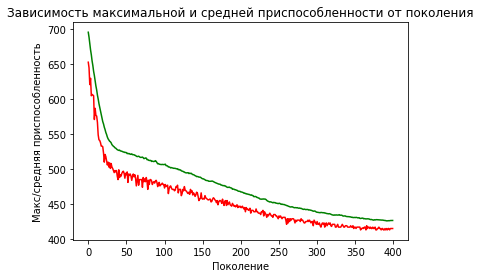

In [22]:
d = main()

# Отображение расписания 

In [24]:
def get_timetabling(individum :list) -> pd.DataFrame:
    """
    Выводим итоговое расписание в виде датафрейма
    """
    
    step = len(CLASSROOMS)
    start_step = 0
    cols = ['day','lesson','a5','b5','a6','b6','a7','b7','a8','a9']
    df = pd.DataFrame(columns = cols)
    day = 1
    lesson = 1

    while start_step < len(individum):
        lst = []
        lst.append(day)
        lst.append(lesson)
        for key, item in enumerate(individum[start_step: start_step + step]):
               lst.append(COURSES[key][item].ItemName[0])
        
        df = pd.concat([df, pd.DataFrame([lst], columns = cols)])
        
        if lesson % 8 == 0:
            lesson = 1
            day += 1
        else:            
            lesson += 1
        start_step += step
        
    return df 

In [25]:
c = [cost(ind) for ind in d]
m = 10000
for ind, cost_ in zip(d, c):
    if cost_ < m:
        best_ind = ind
        
get_timetabling(best_ind)

,day,lesson,a5,b5,a6,b6,a7,b7,a8,a9
0,1,1,Русский,Н,Немецкий язык,Труд,Французский язык,Русский,Н,Н
0,1,2,Н,Н,Н,Французский язык,Н,Труд,География,Н
0,1,3,Н,Литература,Физкультура,Математика,Н,Алгебра,Физкультура,Н
0,1,4,Русский,Н,Немецкий язык,Литература,Физкультура,Алгебра,География,Н
0,1,5,История,Н,История,Математика,Музыка,Н,Общестовазнание,Н
0,1,6,Н,ИЗО,Н,Н,Н,Н,Музыка,Н
0,1,7,Литература,Н,Н,Русский,История,Информатика,Информатика,Н
0,1,8,Н,Русский,Н,Н,Французский язык,Литература,Алгебра,Н
0,2,1,Н,Математика,География,Русский,Алгебра,Литература,Физика,Н
0,2,2,Н,Н,Французский язык,Музыка,История,Музыка,История,Н
